# Installation

In [1]:
%%capture
import os
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    # Do this only in Colab notebooks! Otherwise use pip install unsloth
    !pip install --no-deps bitsandbytes accelerate xformers==0.0.29.post3 peft trl triton cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf datasets huggingface_hub hf_transfer
    !pip install --no-deps unsloth

# for Rouge
! pip install evaluate
! pip install rouge_score

# for BertScore
! pip install transformers
! pip install bert-score

# Load Original Model

In [2]:
from unsloth import FastLanguageModel

max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


/home/ubuntu/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Unsloth: Failed to patch Gemma3ForConditionalGeneration.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [3]:
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Qwen2.5-7B",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)
FastLanguageModel.for_inference(model) # Enable native 2x faster inference

==((====))==  Unsloth 2025.3.19: Fast Qwen2 patching. Transformers: 4.51.3.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.495 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Loading checkpoint shards: 100%|██████████| 2/2 [00:07<00:00,  3.75s/it]


Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(152064, 3584, padding_idx=151654)
    (layers): ModuleList(
      (0-1): 2 x Qwen2DecoderLayer(
        (self_attn): Qwen2Attention(
          (q_proj): Linear(in_features=3584, out_features=3584, bias=True)
          (k_proj): Linear(in_features=3584, out_features=512, bias=True)
          (v_proj): Linear(in_features=3584, out_features=512, bias=True)
          (o_proj): Linear(in_features=3584, out_features=3584, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): Qwen2MLP(
          (gate_proj): Linear4bit(in_features=3584, out_features=18944, bias=False)
          (up_proj): Linear4bit(in_features=3584, out_features=18944, bias=False)
          (down_proj): Linear4bit(in_features=18944, out_features=3584, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen2RMSNorm((3584,), eps=1e-06)
        (post_attention_layernorm): Qwen2RMSNorm((3584,), eps=1e-06)

# Load Fine-Tuned Model

In [4]:
from unsloth import FastLanguageModel

max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

In [5]:
fine_tuned_model, fine_tuned_tokenizer = FastLanguageModel.from_pretrained(
    model_name = "lora_model", # YOUR MODEL YOU USED FOR TRAINING
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)
FastLanguageModel.for_inference(fine_tuned_model) # Enable native 2x faster inference

==((====))==  Unsloth 2025.3.19: Fast Qwen2 patching. Transformers: 4.51.3.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.495 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Loading checkpoint shards: 100%|██████████| 2/2 [00:07<00:00,  3.78s/it]
Unsloth 2025.3.19 patched 28 layers with 28 QKV layers, 28 O layers and 28 MLP layers.


PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): Qwen2ForCausalLM(
      (model): Qwen2Model(
        (embed_tokens): Embedding(152064, 3584, padding_idx=151654)
        (layers): ModuleList(
          (0-1): 2 x Qwen2DecoderLayer(
            (self_attn): Qwen2Attention(
              (q_proj): lora.Linear(
                (base_layer): Linear(in_features=3584, out_features=3584, bias=True)
                (lora_dropout): ModuleDict(
                  (default): Identity()
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=3584, out_features=16, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=16, out_features=3584, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (lora_magnitude_vector): ModuleDict()
              )
              (k_proj): lora.Linear(
 

# Data Prep

In [6]:
from datasets import load_dataset
test_dataset = load_dataset("abisee/cnn_dailymail", name = "3.0.0", split = "test[:1%]")

Generating test split: 100%|██████████| 11490/11490 [00:00<00:00, 69900.71 examples/s]


In [7]:
print(len(test_dataset))
print(test_dataset[0])

115
{'article': '(CNN)The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a step that gives the court jurisdiction over alleged crimes in Palestinian territories. The formal accession was marked with a ceremony at The Hague, in the Netherlands, where the court is based. The Palestinians signed the ICC\'s founding Rome Statute in January, when they also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, including East Jerusalem, since June 13, 2014." Later that month, the ICC opened a preliminary examination into the situation in Palestinian territories, paving the way for possible war crimes investigations against Israelis. As members of the court, Palestinians may be subject to counter-charges as well. Israel and the United States, neither of which is an ICC member, opposed the Palestinians\' efforts to join the body. But Palestinian Foreign Minister Riad al-Malki, speaking at Wedne

# Add formatter

In [8]:
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""

def formatting_prompts_func(input_text):
    instruction = "Given the news article, determine the key highlights."
    output_text = ""
    text = alpaca_prompt.format(instruction, input_text, output_text)
    return text

In [9]:
# Testing the formatter
print(formatting_prompts_func(test_dataset[0]['article']))

Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Given the news article, determine the key highlights.

### Input:
(CNN)The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a step that gives the court jurisdiction over alleged crimes in Palestinian territories. The formal accession was marked with a ceremony at The Hague, in the Netherlands, where the court is based. The Palestinians signed the ICC's founding Rome Statute in January, when they also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, including East Jerusalem, since June 13, 2014." Later that month, the ICC opened a preliminary examination into the situation in Palestinian territories, paving the way for possible war crimes investigations against Israelis. As members of the court, Palestinians ma

### Run Inference

In [23]:
import time

def get_highlights(article, fine_tuned = False):
  start = time.time()
  if fine_tuned:
    inputs = fine_tuned_tokenizer(
    [
      formatting_prompts_func(article)
    ], return_tensors = "pt").to("cuda")

    outputs = fine_tuned_model.generate(**inputs, max_new_tokens = 128)
    decoded_output = fine_tuned_tokenizer.batch_decode(outputs)

    end = time.time()

    return decoded_output[0].split('### Response:')[-1].replace(fine_tuned_tokenizer.eos_token, ''), end - start

  inputs = tokenizer(
  [
    formatting_prompts_func(article)
  ], return_tensors = "pt").to("cuda")

  outputs = model.generate(**inputs, max_new_tokens = 128)
  decoded_output = tokenizer.batch_decode(outputs)

  end = time.time()

  return decoded_output[0].split('### Response:')[-1], end - start

In [43]:
import random

random_index = random.randint(0, len(test_dataset) - 1)
print(f"Testing index: {random_index}")

print("Article:")
print(test_dataset[random_index]['article'])
print()
print("Highlights")
print(test_dataset[random_index]['highlights'])
print()

print("Original Model Test Highlights")
original_model_test = get_highlights(test_dataset[random_index]['article'], fine_tuned=False)
print(original_model_test[0])
print("Original Model Test Time")
print(original_model_test[1])

print()

print("Fine-tuned Model Test Highlights")
fine_tuned_model_test = get_highlights(test_dataset[random_index]['article'], fine_tuned=True)
print(fine_tuned_model_test[0])
print("Fine-tuned Model Test Time")
print(fine_tuned_model_test[1])

Testing index: 0
Article:
(CNN)The Palestinian Authority officially became the 123rd member of the International Criminal Court on Wednesday, a step that gives the court jurisdiction over alleged crimes in Palestinian territories. The formal accession was marked with a ceremony at The Hague, in the Netherlands, where the court is based. The Palestinians signed the ICC's founding Rome Statute in January, when they also accepted its jurisdiction over alleged crimes committed "in the occupied Palestinian territory, including East Jerusalem, since June 13, 2014." Later that month, the ICC opened a preliminary examination into the situation in Palestinian territories, paving the way for possible war crimes investigations against Israelis. As members of the court, Palestinians may be subject to counter-charges as well. Israel and the United States, neither of which is an ICC member, opposed the Palestinians' efforts to join the body. But Palestinian Foreign Minister Riad al-Malki, speaking a

In [44]:
random_index_2 = random.randint(0, len(test_dataset) - 1)
print(f"Testing index: {random_index_2}")

print("Article:")
print(test_dataset[random_index_2]['article'])
print()
print("Highlights")
print(test_dataset[random_index_2]['highlights'])
print()

print("Original Model Test Highlights")
original_model_test_2 = get_highlights(test_dataset[random_index_2]['article'], fine_tuned=False)
print(original_model_test_2[0])
print("Original Model Test Time")
print(original_model_test_2[1])

print()

print("Fine-tuned Model Test Highlights")
fine_tuned_model_test_2 = get_highlights(test_dataset[random_index_2]['article'], fine_tuned=True)
print(fine_tuned_model_test_2[0])
print("Fine-tuned Model Test Time")
print(fine_tuned_model_test_2[1])

Testing index: 81
Article:
(CNN)One hundred and forty-seven victims. Many more families affected. Even more broken hopes and dreams. As Kenyans mourned those killed last week in one of the deadliest terrorist attacks in the nation, citizens used social media to share the victims' stories, hopes and dreams. Using the hashtag #147notjustanumber -- a reference to the number of people, mostly students, killed at Garissa University College on Thursday -- Kenyans tweeted pictures of the victims in happier times. Kenyan authorities have not released a list of the victims. The posts provided heart-wrenching details on the victims, including one about an elderly man whose dreams died with his son. He had reportedly taken a loan to educate him at the university, where he was killed by Al-Shabaab terrorists. The attack in Kenya killed 142 students, three security officers and two university security personnel, and was the nation's deadliest since the bombing of the U.S. Embassy in 1998. Kenyan ch

# Get Data

In [ ]:
import json
from tqdm import tqdm

final_data = []
for test_item in tqdm(test_dataset):
  ground_truth_highlights = test_item['highlights']
  original_model_highlights, original_model_time = get_highlights(test_item['article'], fine_tuned = False)
  fine_tuned_model_highlights, fine_tuned_model_time = get_highlights(test_item['article'], fine_tuned = True)

  final_data.append({
    "article": test_item['article'],
    "ground_truth_all_highlights": ground_truth_highlights,
    "original_model_all_data": (original_model_highlights, original_model_time),
    "fine_tuned_model_all_data": (fine_tuned_model_highlights, fine_tuned_model_time)
  })

ground_truth_all_highlights = [data['ground_truth_all_highlights'] for data in final_data]

original_model_all_highlights = [data['original_model_all_data'][0] for data in final_data]
original_model_all_times = [data['original_model_all_data'][1] for data in final_data]

fine_tuned_model_all_highlights = [data['fine_tuned_model_all_data'][0] for data in final_data]
fine_tuned_model_all_times = [data['fine_tuned_model_all_data'][1] for data in final_data]

# save data to file for backup
with open("final_data.json", "w") as f:
  json.dump(final_data, f)

 34%|███▍      | 39/115 [11:55<24:03, 18.99s/it]Unsloth: Input IDs of length 2416 > the model's max sequence length of 2048.
We shall truncate it ourselves. It's imperative if you correct this issue first.
100%|██████████| 115/115 [36:28<00:00, 19.03s/it]


# Evaluate

# Rogue

https://medium.com/@eren9677/text-summarization-387836c9e178

In [47]:
import evaluate
rouge = evaluate.load('rouge')

original_model_results = rouge.compute(
    predictions = original_model_all_highlights,
    references = ground_truth_all_highlights
)

fine_tuned_model_results = rouge.compute(
    predictions = fine_tuned_model_all_highlights,
    references = ground_truth_all_highlights
)

print(original_model_results)
print(fine_tuned_model_results)

{'rouge1': np.float64(0.25593852325683963), 'rouge2': np.float64(0.09879602742572864), 'rougeL': np.float64(0.1845369489659137), 'rougeLsum': np.float64(0.23482225329274253)}
{'rouge1': np.float64(0.3202412916174494), 'rouge2': np.float64(0.1291838902741764), 'rougeL': np.float64(0.23471503036165922), 'rougeLsum': np.float64(0.29682001157527327)}


## BertScore

https://haticeozbolat17.medium.com/text-summarization-how-to-calculate-bertscore-771a51022964

In [48]:
from transformers import BertTokenizer, BertForMaskedLM, BertModel
from bert_score import BERTScorer

# BERTScore calculation
scorer = BERTScorer(model_type='bert-base-uncased')
P_original_model, R_original_model, F1_original_model = scorer.score(original_model_all_highlights, ground_truth_all_highlights)
P_fine_tuned_model, R_fine_tuned_model, F1_fine_tuned_model = scorer.score(fine_tuned_model_all_highlights, ground_truth_all_highlights)

print(f"BERTScore Precision for original model: {P_original_model.mean():.4f}, Recall: {R_original_model.mean():.4f}, F1: {F1_original_model.mean():.4f}")
print(f"BERTScore Precision for fine-tuned model: {P_fine_tuned_model.mean():.4f}, Recall: {R_fine_tuned_model.mean():.4f}, F1: {F1_fine_tuned_model.mean():.4f}")

BERTScore Precision for original model: 0.4919, Recall: 0.6337, F1: 0.5528
BERTScore Precision for fine-tuned model: 0.5750, Recall: 0.6091, F1: 0.5904


## Inference Time Analysis

In [49]:
# Basic Stats

import numpy as np

def print_inference_stats(times, model_name):
    times = np.array(times)
    print(f"--- {model_name} ---")
    print(f"Mean:    {np.mean(times):.4f} ms")
    print(f"Median:  {np.median(times):.4f} ms")
    print(f"Std Dev: {np.std(times):.4f} ms")
    print(f"Min:     {np.min(times):.4f} ms")
    print(f"Max:     {np.max(times):.4f} ms")
    print()

print_inference_stats(original_model_all_times, "Model A")
print_inference_stats(fine_tuned_model_all_times, "Model B")


--- Model A ---
Mean:    11.4647 ms
Median:  11.3639 ms
Std Dev: 1.5827 ms
Min:     8.9727 ms
Max:     16.8651 ms

--- Model B ---
Mean:    7.5664 ms
Median:  7.3395 ms
Std Dev: 2.2447 ms
Min:     3.5611 ms
Max:     17.9274 ms



/tmp/ipykernel_4576/587399826.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([original_model_all_times, fine_tuned_model_all_times], labels=["Original Model", "Fine-tuned Model"])


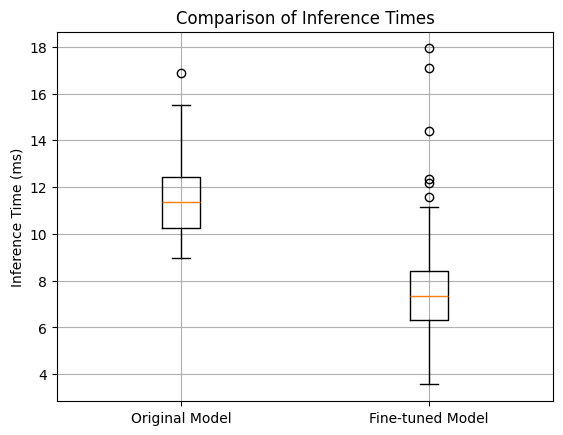

In [50]:
import matplotlib.pyplot as plt

# Box Plot (for quick comparison of median, spread, outliers)
plt.boxplot([original_model_all_times, fine_tuned_model_all_times], labels=["Original Model", "Fine-tuned Model"])
plt.ylabel("Inference Time (ms)")  # or whatever unit
plt.title("Comparison of Inference Times")
plt.grid(True)
plt.show()

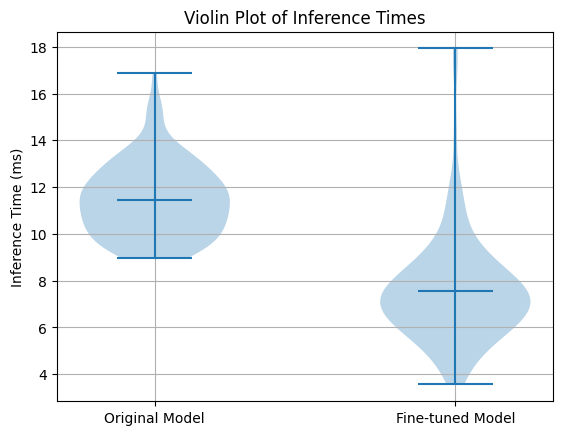

In [51]:
# Violin Plot (fancier version of boxplot + distribution)

plt.violinplot([original_model_all_times, fine_tuned_model_all_times], showmeans=True)
plt.xticks([1, 2], ["Original Model", "Fine-tuned Model"])
plt.ylabel("Inference Time (ms)")
plt.title("Violin Plot of Inference Times")
plt.grid(True)
plt.show()

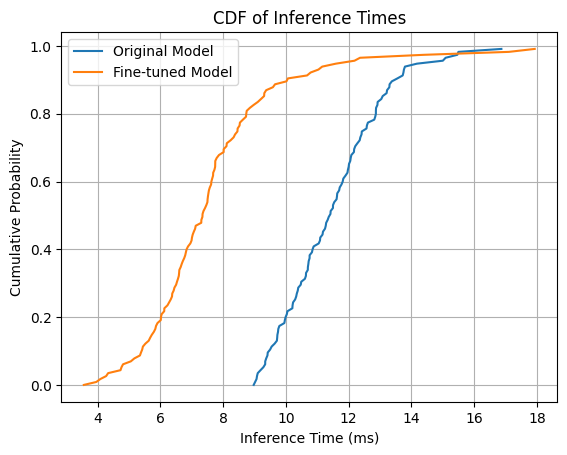

In [52]:
# Cumulative Distribution Function (CDF) (good for seeing which model is faster X% of the time)

# Sort the times
original_model_all_times_sorted = np.sort(original_model_all_times)
fine_tuned_model_all_times_sorted = np.sort(fine_tuned_model_all_times)

# Compute cumulative probabilities
cdf_original_times = np.arange(len(original_model_all_times_sorted)) / len(original_model_all_times_sorted)
cdf_fine_tuned_times = np.arange(len(fine_tuned_model_all_times_sorted)) / len(fine_tuned_model_all_times_sorted)

plt.plot(original_model_all_times_sorted, cdf_original_times, label="Original Model")
plt.plot(fine_tuned_model_all_times_sorted, cdf_fine_tuned_times, label="Fine-tuned Model")
plt.xlabel("Inference Time (ms)")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Inference Times")
plt.legend()
plt.grid(True)
plt.show()

## Potentially Useful

https://asadiqbalch.medium.com/evaluating-llms-made-easy-with-hugging-face-evaluate-3fb1c4be617b